Let's see how the data is distributed and what we should produce to improve the performance.

In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate.dfitpack import types
from sklearn.model_selection import train_test_split
from sympy import false

ds = pd.read_csv('./labelling/data_cleaned_manual.csv')

questions = list(ds['Question'])

ds.head()

,Question,Global Subject,Question Intent
0,Hi,start,greet
1,Hello,start,greet
2,Describe the automaton,automaton,description
3,Is there a transition between q2 and q0?,transition,existence_between
4,Is there a transition between q5 and q7,transition,existence_between


In [2]:
# count the number of questions using the pandas dataframe
questions_count = ds['Question'].count()
# count of unique questions
unique_questions_count = ds['Question'].nunique()
# count of 'Global Subject' unique values
unique_global_subject_count = ds['Global Subject'].nunique()

# display all the unique values of 'Global Subject' using the jupyter notebook; while also displaying the other values
ds['Global Subject'].value_counts()

Global Subject
transition    77
automaton     48
state         48
grammar       33
theory        15
off_topic      6
start          2
Name: count, dtype: int64

In [3]:
ds['Question Intent'].value_counts()

Question Intent
count                 29
existence_from        18
list                  17
description           16
accepted              14
representation        13
existence_between     12
transitions           12
description_brief     10
pattern               10
existence_directed     9
start                  8
final                  8
symbols                7
off_topic              6
cycles                 4
label                  4
example_input          4
final_list             3
states                 3
generic                3
variation              2
greet                  2
final_count            2
validity               2
simulation             2
regex                  2
definition             2
input                  1
existence_into         1
directionality         1
details                1
self_loop              1
Name: count, dtype: int64

In [4]:
# join the 'Global Subject' and 'Question Intent' columns to see how many "combined" unique values there are
comb = ds['Global Subject'] + ':' + ds['Question Intent']
comb.value_counts()

state:count                      19
transition:existence_from        18
transition:list                  15
grammar:accepted                 14
automaton:description            14
automaton:representation         13
transition:existence_between     12
transition:count                 10
automaton:description_brief      10
automaton:pattern                 9
transition:existence_directed     9
state:start                       8
state:final                       7
grammar:symbols                   7
state:transitions                 7
off_topic:off_topic               6
theory:transitions                5
grammar:example_input             4
transition:cycles                 4
transition:label                  4
state:final_list                  3
theory:generic                    3
theory:states                     3
grammar:variation                 2
state:final_count                 2
start:greet                       2
grammar:validity                  2
grammar:simulation          

Now let's also load the additional data made by me.

In [5]:
ds_automaton = pd.read_csv('./new_questions/automaton_questions.csv')
ds_state = pd.read_csv('./new_questions/state_questions.csv')
ds_transition = pd.read_csv('./new_questions/transition_questions.csv')
ds_grammar = pd.read_csv('./new_questions/grammar_questions.csv')
ds_start = pd.read_csv('./new_questions/start_questions.csv')
ds_theory = pd.read_csv('./new_questions/theory_questions.csv')

print("Automaton questions count: ", ds_automaton['Question'].count())
print("State questions count: ", ds_state['Question'].count())
print("Transition questions count: ", ds_transition['Question'].count())
print("Grammar questions count: ", ds_grammar['Question'].count())
print("Start questions count: ", ds_start['Question'].count())
print("Theory questions count: ", ds_theory['Question'].count())

Automaton questions count:  93
State questions count:  56
Transition questions count:  148
Grammar questions count:  111
Start questions count:  17
Theory questions count:  100


Finally, let's join all the data we have to see the distribution of the data.

In [6]:
combined = pd.concat([ds, ds_automaton, ds_state, ds_transition, ds_grammar, ds_start, ds_theory])

print("Combined questions count: ", combined['Question'].count())
print("Combined unique questions count: ", combined['Question'].nunique())

combined['Global Subject'].value_counts()

Combined questions count:  754
Combined unique questions count:  715


Global Subject
transition    225
grammar       144
automaton     141
theory        115
state         104
start          19
off_topic       6
Name: count, dtype: int64

In [7]:
combined['Question Intent'].value_counts()

Question Intent
description           74
accepted              57
existence_from        42
count                 40
generic               39
list                  38
label                 36
transitions           34
pattern               27
existence_between     25
existence_directed    21
final                 21
simulation            20
variation             19
greet                 19
representation        19
states                18
existence_into        17
definition            16
description_brief     16
start                 15
symbols               14
validity              14
cycles                12
details               12
input                 12
self_loop             11
example_input         11
regex                  9
final_count            8
off_topic              6
final_list             6
optimization           6
deterministic          5
reachability           5
start_final            3
dead                   3
directionality         2
image                  2
Name: cou

In [8]:
comb = combined['Global Subject'] + ':' + combined['Question Intent']
comb.value_counts()

automaton:description            69
grammar:accepted                 57
transition:existence_from        42
theory:generic                   39
transition:label                 36
transition:list                  31
theory:transitions               27
state:count                      27
transition:existence_between     25
transition:existence_directed    21
automaton:pattern                20
grammar:simulation               20
grammar:variation                19
start:greet                      19
automaton:representation         19
theory:states                    18
transition:existence_into        17
automaton:description_brief      16
theory:definition                16
state:start                      15
grammar:symbols                  14
grammar:validity                 14
state:final                      13
transition:count                 13
state:details                    12
transition:input                 12
transition:cycles                12
grammar:example_input       

<Axes: title={'center': 'Global Subject distribution'}, xlabel='Global Subject'>

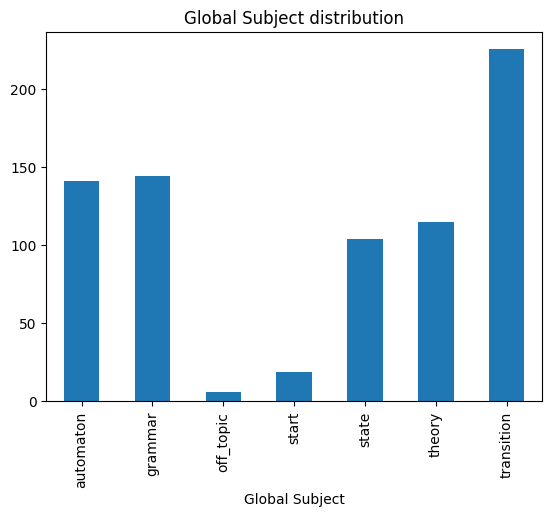

In [9]:
combined.groupby('Global Subject')['Question Intent'].count().plot(kind='bar', title='Global Subject distribution')

<Axes: title={'center': 'Global Subject unique Question Intent distribution'}, xlabel='Global Subject'>

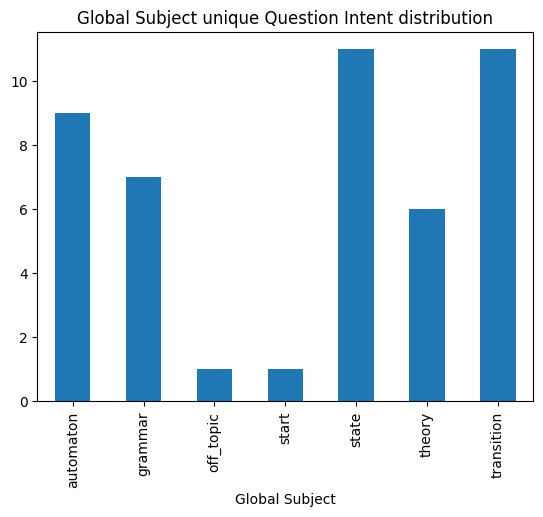

In [10]:
combined.groupby('Global Subject')['Question Intent'].nunique().plot(kind='bar', title='Global Subject unique Question Intent distribution')

<Axes: title={'center': 'Question intents for "automaton" global subject'}, xlabel='Question Intent'>

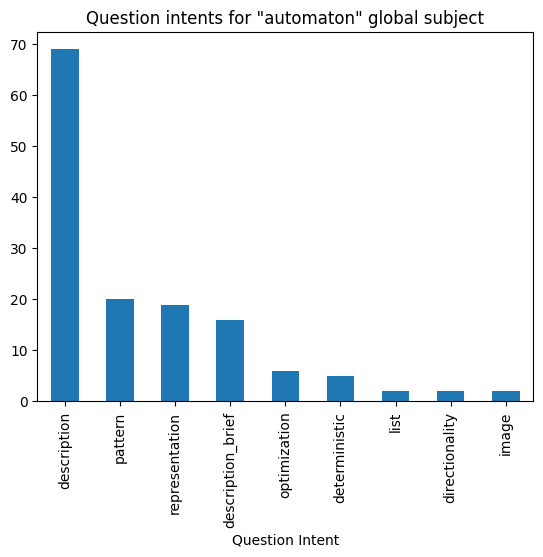

In [11]:
# filter for 'automaton' GS and show the 'Question Intent' distribution
combined[combined['Global Subject'] == 'automaton']['Question Intent'].value_counts().plot(kind='bar', title='Question intents for "automaton" global subject')

<Axes: title={'center': 'Question intents for "state" global subject'}, xlabel='Question Intent'>

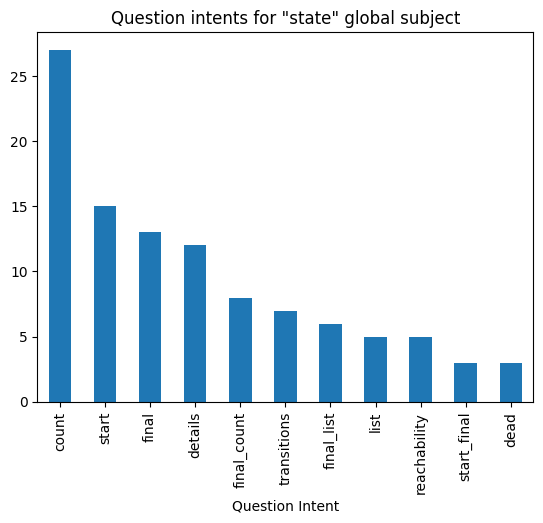

In [12]:
# filter for 'state' GS and show the 'Question Intent' distribution
combined[combined['Global Subject'] == 'state']['Question Intent'].value_counts().plot(kind='bar', title='Question intents for "state" global subject')

In [13]:
from sklearn.preprocessing import LabelEncoder

should_save_model = false

le = LabelEncoder()
combined['gs'] = le.fit_transform(combined['Global Subject'])
combined['qi'] = le.fit_transform(combined['Question Intent'])
train_test_split(combined['Question'], combined['gs'], combined['qi'], test_size=0.2, random_state=34197,
                 stratify=combined['gs'])

[21         How many transitions are there from q0 to q1?
 214                       Briefly describe the automaton
 65                            How many states are there?
 20     What are the inputs and outputs of the automaton?
 217                        What is the accepted language
                              ...                        
 53              How many states does the automaton have?
 20     How do finite automata recognize patterns in i...
 3               Is there a transition between q2 and q0?
 80     Is there a transition labeled 'f' between q2 a...
 61     Are there any transitions from q2 that do not ...
 Name: Question, Length: 603, dtype: object,
 82       Is '101' accepted or rejected by the automaton?
 68     Does the automaton accept any string that star...
 64     How do you define the language accepted by an ...
 3      What are the initial and final states of the a...
 57                   What transitions enter and exit q2?
                           

In [14]:
if should_save_model:
    # https://huggingface.co/datasets/rajpurkar/squad_v2
    splits = {'train': 'squad_v2/train-00000-of-00001.parquet',
              'validation': 'squad_v2/validation-00000-of-00001.parquet'}
    df_squad_v2 = pd.read_parquet("hf://datasets/rajpurkar/squad_v2/" + splits["train"])

    # Double square parenthesis to get a dataframe
    sampled_ot_examples = df_squad_v2.sample(100, random_state=34197)[['question']]
    sampled_ot_examples.rename(columns={'question': 'Question'}, inplace=True)

    sampled_ot_examples['Global Subject'] = 'off_topic'
    sampled_ot_examples['Question Intent'] = 'off_topic'

    # save the combined data to a new csv file
    pd.concat([combined, sampled_ot_examples]).to_csv('./multitask_training/data_cleaned_manual_combined.csv',
                                                      index=False)